In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten  # Importing CNN Module
from tensorflow.keras.utils import to_categorical

## Load and Preprocess the Data

In [2]:
with np.load("mnist.npz") as data:
    x_train = data['x_train']    # contain the images (handwritten digits) for training
    y_train = data['y_train']    # contain the images (handwritten digits) for testing
    x_test = data['x_test']      # are the labels corresponding to the images (0-9 digits).
    y_test = data['y_test']      # are the labels corresponding to the images (0-9 digits).

In [3]:
type(x_train)

numpy.ndarray

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
img_1 = x_train[0]
x_train[50].shape

(28, 28)

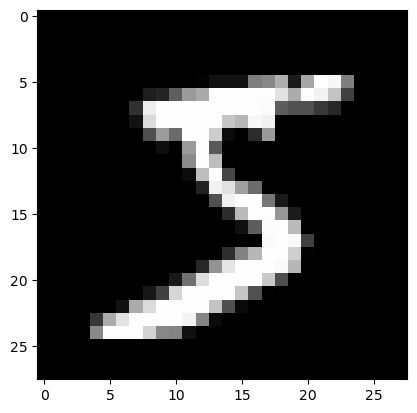

In [29]:
import matplotlib.pyplot as plt
plt.imshow(img_1,cmap='grey')


## Normalization 

In [11]:
# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

## Define the Model

## Build the Model


Adds a 1D Convolutional layer with 10 filters, each with a kernel size of 3

The ReLU activation function is applied to introduce non-linearity.

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="relu", input_shape=(28, 28)),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Conv1D(10, 3, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 26, 10)         │           850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 24, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 22, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 20, 10)         │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,790 (14.80 KB)

 Trainable params: 3,790 (14.80 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [59]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [63]:
history_1 = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9680 - loss: 0.1029 - val_accuracy: 0.9737 - val_loss: 0.0820
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9716 - loss: 0.0941 - val_accuracy: 0.9760 - val_loss: 0.0773
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9722 - loss: 0.0891 - val_accuracy: 0.9749 - val_loss: 0.0746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9752 - loss: 0.0833 - val_accuracy: 0.9731 - val_loss: 0.0851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9760 - loss: 0.0794 - val_accuracy: 0.9756 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9775 - loss: 0.0713 - val_accuracy: 0.9776 - val_loss: 0.0698
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9793 - loss: 0.0659 - val_accuracy: 0.9796 - val_loss: 0.0665
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9806 - loss: 0

## Ploting Loss Function

In [65]:
# PLot the validation and training curvees seperately
def plot_loss_curves(history):
  """
  Returns seperate Loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss= history.history["val_loss"]

  accuracy= history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot accuracy
  plt.figure() # Create a new figure
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

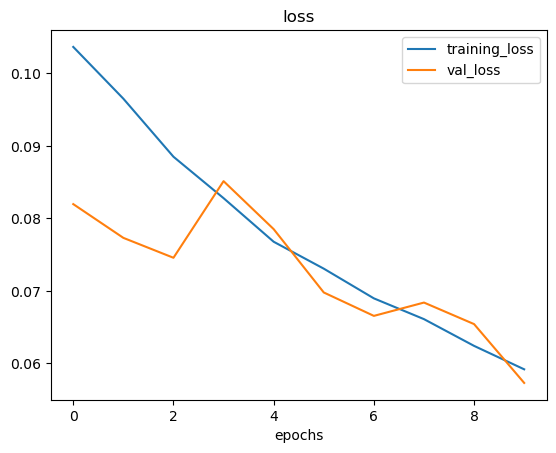

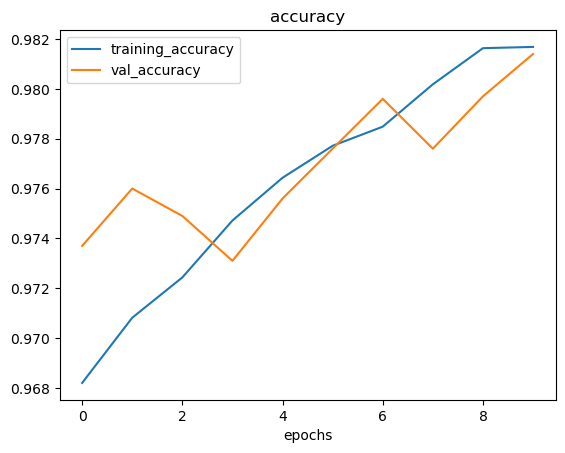

In [67]:
plot_loss_curves(history_1)

## Evaluate the Model

In [69]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step


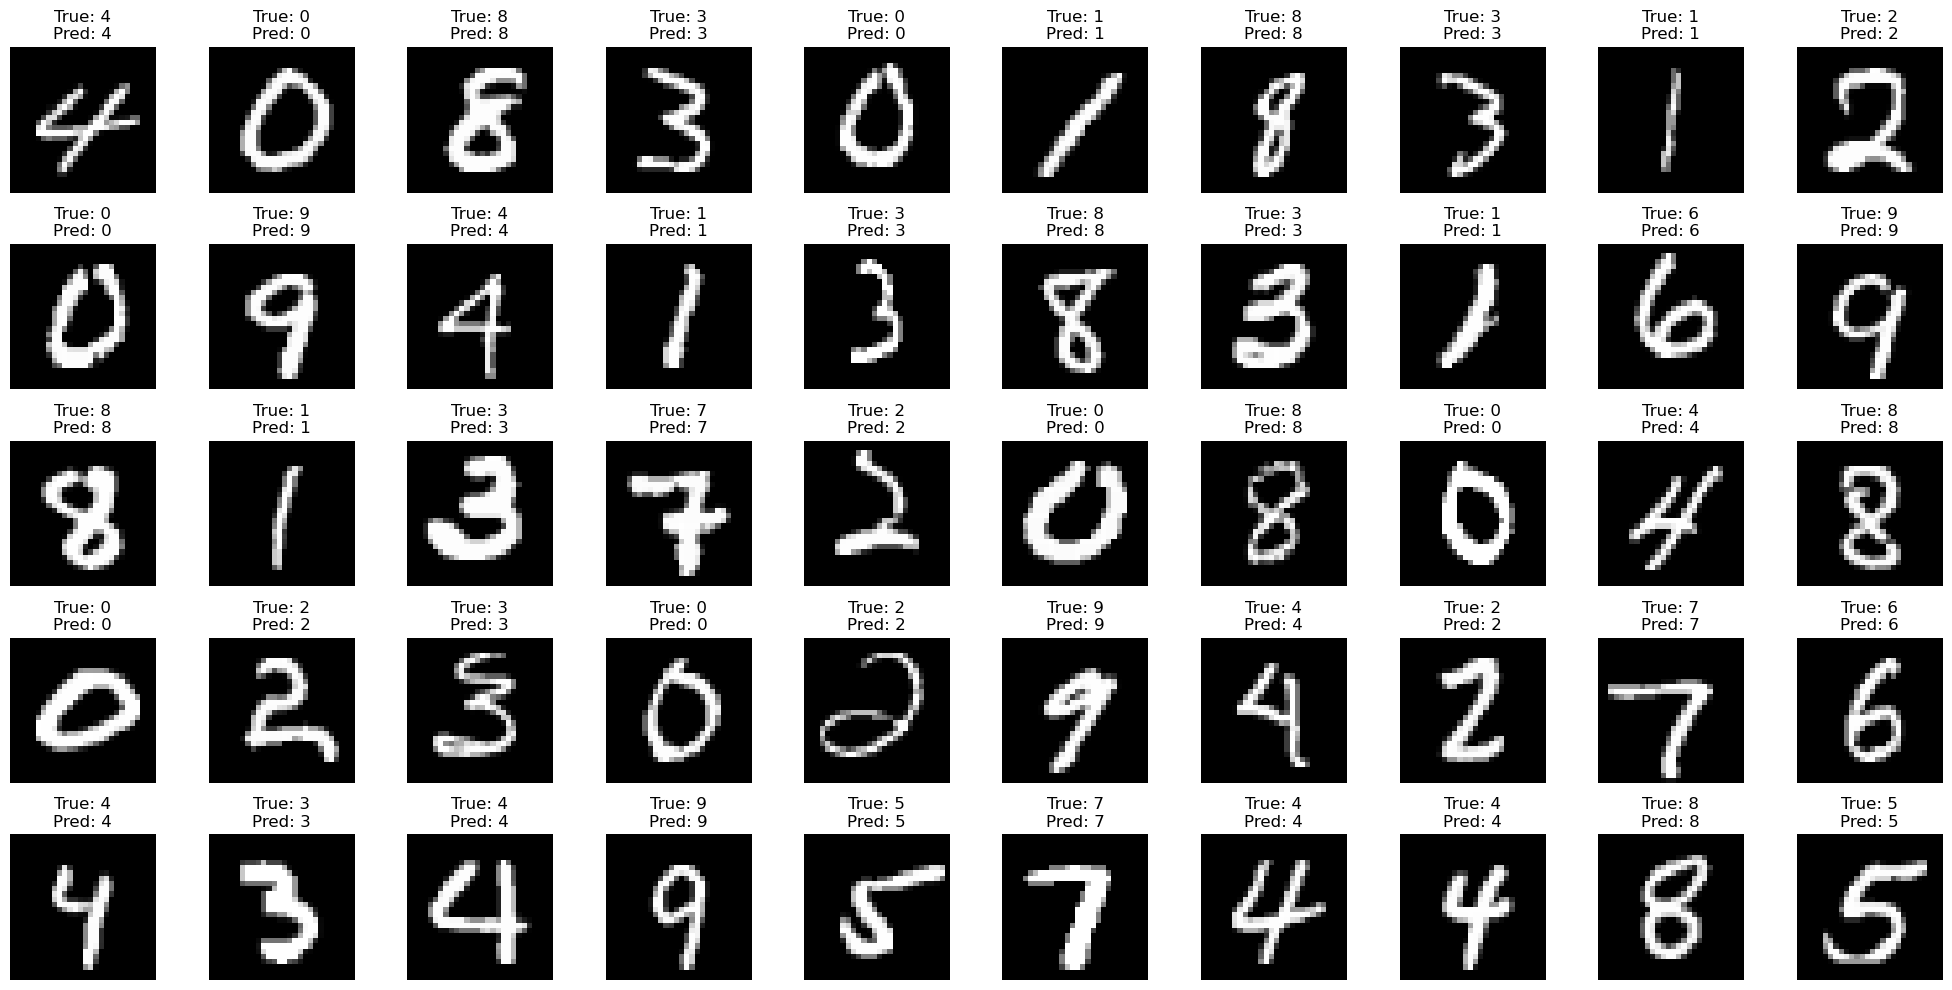

In [71]:
import matplotlib.pyplot as plt

# 1. Select 50 random images from the test set
num_images = 50
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)
test_images = x_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# 2. Predict the labels for these images
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# 3. Plot the images with their predicted and true labels
plt.figure(figsize=(20, 10))
rows = num_images // 10
for i in range(num_images):
    plt.subplot(rows, 10, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()